In [1]:
import pandas as pd
import numpy as np
from module_pro import generate_model,generate_df

[nltk_data] Downloading package punkt to /home/ackerman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ackerman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading corpus: Package 'corpus' not found in index
[nltk_data] Error loading stem: Package 'stem' not found in index


In [2]:
df = pd.read_excel('../data/raw_data/excel chat.xlsx')
df

,saludos,presentaciones,informacion,recomendaciones
0,¡Hola!,"Hola, soy Juan.",¿Cuál es tu mecanismo de operación?,¿Tienes alguna película o serie que recomendar...
1,Buenos días.,"Me llamo María, mucho gusto.",¿Cuál es tu modo de funcionamiento?,¿Podrías sugerirme una buena película para ver...
2,Buenas tardes.,"Encantado, me llamo David.",¿Cómo trabajas en términos de proceso?,¿Qué película o serie me recomendarías para re...
3,Buenas noches.,"Soy Ana, ¿cómo estás?",¿De qué manera llevas a cabo tus tareas?,¿Conoces alguna película emocionante que valga...
4,¿Qué tal?,"Mi nombre es Carlos, un placer conocerte.",¿Cuál es tu método de ejecución?,¿Cuál es tu serie de televisión favorita en es...
...,...,...,...,...
95,"¡Hola, ¿cómo te va con tu humor?","Hola, me dicen Pablo.",¿Qué talentos tienes?,¿Qué me sugieres ver en este momento?
96,"¡Hola, ¿cómo estás de humor?","Soy Isabel, un placer.",¿En qué eres experto?,¿Qué está bueno para ver en streaming?
97,"¡Hola, ¿cómo estás de humor hoy?",Puedes llamarme Juanita.,¿Qué dominas?,¿Algún programa que me atrape desde el princi...
98,"¡Hola, ¿cómo te encuentras de humor?","Hola, me llaman Laura Sofía.",¿Qué puedes hacer mejor que otros?,¿Qué serie o película me recomendarías hoy?


In [3]:
text=[]
text.extend(df['saludos'])
text.extend(df['presentaciones'])
text.extend(df['informacion'])
text.extend(df['recomendaciones'])

text

['¡Hola!',
 'Buenos días.',
 'Buenas tardes.',
 'Buenas noches.',
 '¿Qué tal?',
 '¿Cómo estás?',
 '¿Qué haces?',
 '¿Cómo va todo?',
 '¿Cómo te encuentras?',
 '¿Qué hay de nuevo?',
 '¿Qué pasa?',
 '¿Qué cuentas?',
 '¿Qué onda?',
 '¿Cómo te va?',
 '¿Cómo te sientes?',
 '¡Saludos!',
 '¡Buen día!',
 '¡Hola, qué tal!',
 '¡Hola, ¿qué hubo?',
 '¡Hey!',
 '¡Hola, amigo!',
 '¡Buenas!',
 '¡Qué gusto verte!',
 '¡Hola, buenos días!',
 '¡Hola, buenas tardes!',
 '¡Hola, buenas noches!',
 '¿Cómo andas?',
 '¿Qué tal va todo?',
 '¿Qué tal estás?',
 '¿Qué hay de tu vida?',
 '¿Cómo te trata la vida?',
 '¿Cómo te va en todo?',
 '¡Hola, cómo estás!',
 '¡Qué alegría verte!',
 '¡Hola, qué tal estás!',
 '¡Hola, cómo has estado!',
 '¡Hola, ¿cómo te va?',
 '¡Hola, ¿cómo estás hoy?',
 '¡Buenas, ¿cómo estás?',
 '¡Hola, ¿qué cuentas?',
 '¡Hola, ¿qué tal estás hoy?',
 '¡Hola, ¿qué tal te encuentras?',
 '¡Hola, ¿cómo te sientes?',
 '¡Hola, ¿cómo lo llevas?',
 '¡Hola, ¿cómo lo has pasado?',
 '¡Hola, ¿cómo te ha ido?',

In [4]:
len(text)

400

In [5]:
df_proccesed = pd.DataFrame({'text':text,
             'target_saludo':0,
             'target_presentacion':0,
             'target informacion':0,
             'target recomendacion':0})

In [6]:
df_proccesed

,text,target_saludo,target_presentacion,target informacion,target recomendacion
0,¡Hola!,0,0,0,0
1,Buenos días.,0,0,0,0
2,Buenas tardes.,0,0,0,0
3,Buenas noches.,0,0,0,0
4,¿Qué tal?,0,0,0,0
...,...,...,...,...,...
395,¿Qué me sugieres ver en este momento?,0,0,0,0
396,¿Qué está bueno para ver en streaming?,0,0,0,0
397,¿Algún programa que me atrape desde el princi...,0,0,0,0
398,¿Qué serie o película me recomendarías hoy?,0,0,0,0


In [7]:
df_proccesed['target_saludo'].iloc[0:100] = 1
df_proccesed['target_presentacion'].iloc[100:200] = 1
df_proccesed['target informacion'].iloc[200:300] = 1
df_proccesed['target recomendacion'].iloc[300:400] = 1

/tmp/ipykernel_9978/1175268902.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_proccesed['target_saludo'].iloc[0:100] = 1
/tmp/ipykernel_9978/1175268902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [8]:
df_proccesed.iloc[300:400]

,text,target_saludo,target_presentacion,target informacion,target recomendacion
300,¿Tienes alguna película o serie que recomendar...,0,0,0,1
301,¿Podrías sugerirme una buena película para ver...,0,0,0,1
302,¿Qué película o serie me recomendarías para re...,0,0,0,1
303,¿Conoces alguna película emocionante que valga...,0,0,0,1
304,¿Cuál es tu serie de televisión favorita en es...,0,0,0,1
...,...,...,...,...,...
395,¿Qué me sugieres ver en este momento?,0,0,0,1
396,¿Qué está bueno para ver en streaming?,0,0,0,1
397,¿Algún programa que me atrape desde el princi...,0,0,0,1
398,¿Qué serie o película me recomendarías hoy?,0,0,0,1


In [11]:
permutaciones = ['1234 , 1243 , 1324 , 1342 , 1423 , 1432 , 2134 , 2143 , 2314 , 2341 , 2413 , 2431 , 3124 , 3142 , 3214 , 3241 , 3412 , 3421 , 4123 , 4132 , 4213 , 4231 , 4312 , 4321']

In [12]:
df_proccesed

,text,target_saludo,target_presentacion,target informacion,target recomendacion
0,¡Hola!,1,0,0,0
1,Buenos días.,1,0,0,0
2,Buenas tardes.,1,0,0,0
3,Buenas noches.,1,0,0,0
4,¿Qué tal?,1,0,0,0
...,...,...,...,...,...
395,¿Qué me sugieres ver en este momento?,0,0,0,1
396,¿Qué está bueno para ver en streaming?,0,0,0,1
397,¿Algún programa que me atrape desde el princi...,0,0,0,1
398,¿Qué serie o película me recomendarías hoy?,0,0,0,1


In [13]:
from module_pro import generate_model
model = generate_model(df_proccesed['text'],df=True)

In [14]:
model.vocabulary_

{'dej': 72,
 'isabel': 157,
 'despu': 74,
 'importari': 148,
 'practic': 229,
 'anim': 20,
 'tare': 289,
 'entend': 101,
 'explic': 112,
 'victor': 312,
 'gan': 126,
 'cristin': 59,
 'mism': 196,
 'pelicul': 224,
 'humor': 142,
 'streaming': 278,
 'situacion': 273,
 'algun': 12,
 'mejor': 189,
 'encontr': 97,
 'are': 25,
 'carl': 40,
 'salud': 262,
 'javi': 158,
 'alex': 11,
 'implic': 147,
 'fresc': 122,
 'divert': 84,
 'transcurr': 298,
 'ofrec': 209,
 'enganchari': 100,
 'seri': 265,
 'solucion': 276,
 'elen': 92,
 'empujon': 95,
 'adict': 3,
 'mari': 183,
 'mir': 194,
 'cienci': 44,
 'respect': 256,
 'llam': 171,
 'expert': 111,
 'profund': 235,
 'ficcion': 117,
 'sobresal': 274,
 'antoni': 22,
 'tar': 287,
 'util': 303,
 'cre': 57,
 'talent': 285,
 'suger': 279,
 'carolin': 42,
 'sistem': 272,
 'pedr': 222,
 'luci': 173,
 'domin': 85,
 'hech': 137,
 'favorit': 114,
 'das': 66,
 'entreteng': 104,
 'tel': 290,
 'mart': 185,
 'genial': 128,
 'pabl': 215,
 'involucr': 156,
 'obra': 20

In [15]:
len(model.get_feature_names_out()), len(set(model.get_feature_names_out())) # leems are already setted

(315, 315)

In [19]:
df_proccesed

,text,target_saludo,target_presentacion,target informacion,target recomendacion
0,¡Hola!,1,0,0,0
1,Buenos días.,1,0,0,0
2,Buenas tardes.,1,0,0,0
3,Buenas noches.,1,0,0,0
4,¿Qué tal?,1,0,0,0
...,...,...,...,...,...
395,¿Qué me sugieres ver en este momento?,0,0,0,1
396,¿Qué está bueno para ver en streaming?,0,0,0,1
397,¿Algún programa que me atrape desde el princi...,0,0,0,1
398,¿Qué serie o película me recomendarías hoy?,0,0,0,1


In [20]:
df_proccesed['target'] = None

In [21]:
df_proccesed['target'] = df_proccesed.apply(lambda x:('saludo' if x['target_saludo'] == 1 else x['target']),axis=1)
df_proccesed['target'] = df_proccesed.apply(lambda x:('presentacion' if x['target_presentacion'] == 1 else x['target']),axis=1)
df_proccesed['target'] = df_proccesed.apply(lambda x:('informacion' if x['target informacion'] == 1 else x['target']),axis=1)
df_proccesed['target'] = df_proccesed.apply(lambda x:('recomendacion' if x['target recomendacion'] == 1 else x['target']),axis=1)

In [22]:
df_proccesed

,text,target_saludo,target_presentacion,target informacion,target recomendacion,target
0,¡Hola!,1,0,0,0,saludo
1,Buenos días.,1,0,0,0,saludo
2,Buenas tardes.,1,0,0,0,saludo
3,Buenas noches.,1,0,0,0,saludo
4,¿Qué tal?,1,0,0,0,saludo
...,...,...,...,...,...,...
395,¿Qué me sugieres ver en este momento?,0,0,0,1,recomendacion
396,¿Qué está bueno para ver en streaming?,0,0,0,1,recomendacion
397,¿Algún programa que me atrape desde el princi...,0,0,0,1,recomendacion
398,¿Qué serie o película me recomendarías hoy?,0,0,0,1,recomendacion


In [23]:
df_proccesed['target'] = df_proccesed.apply(lambda x:(1 if x['target_saludo'] == 1 else x['target']),axis=1)
df_proccesed['target'] = df_proccesed.apply(lambda x:(2 if x['target_presentacion'] == 1 else x['target']),axis=1)
df_proccesed['target'] = df_proccesed.apply(lambda x:(3 if x['target informacion'] == 1 else x['target']),axis=1)
df_proccesed['target'] = df_proccesed.apply(lambda x:(4 if x['target recomendacion'] == 1 else x['target']),axis=1)

In [24]:
df_proccesed

,text,target_saludo,target_presentacion,target informacion,target recomendacion,target
0,¡Hola!,1,0,0,0,1
1,Buenos días.,1,0,0,0,1
2,Buenas tardes.,1,0,0,0,1
3,Buenas noches.,1,0,0,0,1
4,¿Qué tal?,1,0,0,0,1
...,...,...,...,...,...,...
395,¿Qué me sugieres ver en este momento?,0,0,0,1,4
396,¿Qué está bueno para ver en streaming?,0,0,0,1,4
397,¿Algún programa que me atrape desde el princi...,0,0,0,1,4
398,¿Qué serie o película me recomendarías hoy?,0,0,0,1,4


In [25]:
df_proccesed.dtypes

text                    object
target_saludo            int64
target_presentacion      int64
target informacion       int64
target recomendacion     int64
target                   int64
dtype: object

In [26]:
from module_pro import generate_model, generate_df
bowler_model = generate_model(df_proccesed['text'],df=True) #modelo bowler
df_generated = generate_df(df_proccesed['text'],bow_model=bowler_model)
df_generated


,raw_data,tokens,no stops words,lematization,text coded
0,¡Hola!,[hola],[[hola]],[hol],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Buenos días.,"[buenos, dias]","[[buenos], [dias]]","[buen, dias]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Buenas tardes.,"[buenas, tardes]","[[buenas], [tardes]]","[buen, tard]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Buenas noches.,"[buenas, noches]","[[buenas], [noches]]","[buen, noch]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,¿Qué tal?,"[que, tal]","[[que], [tal]]",[tal],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
395,¿Qué me sugieres ver en este momento?,"[que, me, sugieres, ver, en, este, momento]","[[que], [me], [sugieres], [ver], [en], [este],...","[sugier, ver, moment]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
396,¿Qué está bueno para ver en streaming?,"[que, esta, bueno, para, ver, en, streaming]","[[que], [esta], [bueno], [para], [ver], [en], ...","[buen, ver, streaming]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
397,¿Algún programa que me atrape desde el princi...,"[algun, programa, que, me, atrape, desde, el, ...","[[algun], [programa], [que], [me], [atrape], [...","[algun, program, atrap, principi]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
398,¿Qué serie o película me recomendarías hoy?,"[que, serie, o, pelicula, me, recomendarias, hoy]","[[que], [serie], [o], [pelicula], [me], [recom...","[seri, pelicul, recomendari, hoy]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [27]:
x_data = df_generated['text coded'].values #elemnts of each array are already floats
y_data= np.asarray(df_proccesed['target'].values,dtype='float32')

In [28]:
x_data.shape, y_data.shape

((400,), (400,))

In [29]:
type(x_data), type(y_data)

(numpy.ndarray, numpy.ndarray)

In [30]:
x_data[220], y_data[220]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [31]:
from sklearn.model_selection import train_test_split #split data
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [32]:
print('x train: {} x test: {} y train: {} y test: {}'.format(x_train.shape,x_test.shape,y_train.shape,y_test.shape)) 

x train: (320,) x test: (80,) y train: (320,) y test: (80,)


In [33]:
x_train.tolist()

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [34]:
x_train.shape

(320,)

In [35]:
y_train.shape

(320,)

In [36]:
from sklearn.naive_bayes import MultinomialNB


In [37]:
model_clasificator = MultinomialNB()
model_clasificator.fit(x_train.tolist(),y_train)

MultinomialNB()

In [38]:
y_test,y_train

(array([3., 3., 1., 3., 1., 1., 4., 1., 3., 2., 1., 4., 1., 1., 2., 1., 3.,
        4., 3., 4., 1., 1., 4., 3., 1., 4., 2., 3., 3., 2., 4., 2., 3., 1.,
        3., 2., 2., 4., 2., 2., 4., 1., 1., 1., 1., 4., 2., 2., 1., 2., 1.,
        4., 4., 1., 4., 1., 3., 2., 1., 2., 2., 3., 3., 1., 2., 1., 4., 3.,
        4., 1., 4., 2., 1., 1., 4., 3., 3., 4., 2., 3.], dtype=float32),
 array([1., 1., 3., 3., 3., 1., 3., 4., 2., 1., 3., 4., 2., 3., 2., 4., 4.,
        4., 3., 1., 3., 2., 1., 1., 2., 1., 1., 2., 4., 4., 2., 4., 3., 4.,
        3., 1., 1., 3., 4., 3., 2., 2., 1., 4., 1., 2., 4., 4., 2., 3., 4.,
        2., 3., 2., 2., 2., 3., 3., 3., 4., 1., 2., 3., 2., 2., 3., 1., 2.,
        2., 4., 1., 4., 3., 2., 1., 2., 2., 1., 4., 4., 4., 3., 3., 2., 4.,
        1., 4., 2., 2., 3., 1., 1., 2., 1., 2., 4., 1., 3., 1., 1., 1., 2.,
        2., 2., 1., 2., 4., 3., 4., 2., 2., 2., 4., 1., 4., 4., 4., 4., 4.,
        4., 2., 3., 3., 3., 3., 2., 1., 1., 4., 2., 3., 2., 2., 4., 3., 2.,
        4., 3.,

In [39]:
y_predict = model_clasificator.predict(x_test.tolist())
y_predict

array([3., 2., 3., 3., 1., 1., 4., 1., 3., 1., 1., 4., 1., 1., 2., 1., 3.,
       4., 3., 4., 1., 3., 4., 3., 1., 4., 2., 3., 3., 2., 4., 2., 3., 1.,
       3., 2., 2., 4., 2., 2., 3., 1., 1., 1., 1., 4., 2., 2., 2., 2., 1.,
       4., 4., 1., 4., 1., 3., 2., 1., 2., 2., 3., 4., 1., 2., 1., 3., 3.,
       4., 1., 4., 2., 2., 1., 4., 3., 3., 4., 2., 3.], dtype=float32)

In [40]:
y_predict,y_test

(array([3., 2., 3., 3., 1., 1., 4., 1., 3., 1., 1., 4., 1., 1., 2., 1., 3.,
        4., 3., 4., 1., 3., 4., 3., 1., 4., 2., 3., 3., 2., 4., 2., 3., 1.,
        3., 2., 2., 4., 2., 2., 3., 1., 1., 1., 1., 4., 2., 2., 2., 2., 1.,
        4., 4., 1., 4., 1., 3., 2., 1., 2., 2., 3., 4., 1., 2., 1., 3., 3.,
        4., 1., 4., 2., 2., 1., 4., 3., 3., 4., 2., 3.], dtype=float32),
 array([3., 3., 1., 3., 1., 1., 4., 1., 3., 2., 1., 4., 1., 1., 2., 1., 3.,
        4., 3., 4., 1., 1., 4., 3., 1., 4., 2., 3., 3., 2., 4., 2., 3., 1.,
        3., 2., 2., 4., 2., 2., 4., 1., 1., 1., 1., 4., 2., 2., 1., 2., 1.,
        4., 4., 1., 4., 1., 3., 2., 1., 2., 2., 3., 3., 1., 2., 1., 4., 3.,
        4., 1., 4., 2., 1., 1., 4., 3., 3., 4., 2., 3.], dtype=float32))

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[22,  2,  2,  0],
       [ 1, 17,  0,  0],
       [ 0,  1, 16,  1],
       [ 0,  0,  2, 16]])

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8875

In [43]:
from module_pro import generate_model, bow_text
bow_model =generate_model(df_proccesed['text'],df=True)

In [44]:
bow_text('hola',bow_model=bow_model,df=False)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [55]:
def get_prediction(bow_model,model_clasification):
    texto = input('you: ')
    if (texto.lower() == 'salir') or (texto.lower()=='exit'):
        return False
    else:
        from module_pro import bow_text
        texto_codex = bow_text(texto,bow_model=bow_model,df=False)
        prediction = model_clasification.predict(texto_codex.reshape(1,-1))
        probabilities = model_clasification.predict_proba(texto_codex.reshape(1,-1))
        print('saludo, presentacion, infomacion, recomendacion')
        print(probabilities)
        if probabilities[0][0] >0.30:
            print('target: saludo')
        elif probabilities[0][1] >0.30:
            print('target: presentacion')
        elif probabilities[0][2] >0.30:
            print('target: informacion')
        elif probabilities[0][3] >0.30:
            print('target: recomendacion')
        else: 
            print('targget: no match')
        return True
        #print(prediction)

In [58]:
print('Para salir del chat solo escribe exit o salir')
c= True
while c == True:
    c = get_prediction(bow_model=bow_model,model_clasification=model_clasificator) == True


Para salir del chat solo escribe exit o salir
saludo, presentacion, infomacion, recomendacion
[[0.66569235 0.31181242 0.01298809 0.00950713]]
target: saludo
saludo, presentacion, infomacion, recomendacion
[[0.20449453 0.20689752 0.43090075 0.15770719]]
target: informacion


In [48]:
import joblib
joblib.dump(model_clasificator,'../models/basic_model.joblib')

['../models/basic_model.joblib']

In [49]:
from sklearn.linear_model import LogisticRegression
def logistic_regression(solver_c, multiclass_, c_):
  logistic_regression_model = LogisticRegression(random_state=42, solver=solver_c, multi_class=multiclass_, n_jobs= -1, C =c_, max_iter=10000)
  return logistic_regression_model

In [50]:
multicass = ['ovr', 'multinomial']
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores = []
params = []

for i in multicass:
  for j in solver_list:
    try:
      model = logistic_regression(j, i, 1)
      model.fit(x_train.tolist(), y_train)
      y_pred = model.predict(x_test.tolist())
      params.append(i + '-' + j)
      accuracy = accuracy_score(y_test, y_pred)
      scores.append(accuracy)
    except:
      None

/home/ackerman/anaconda3/envs/chatbot_nltk/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/ackerman/anaconda3/envs/chatbot_nltk/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
/home/ackerman/anaconda3/envs/chatbot_nltk/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/ackerman/anaconda3/envs/chatbot_nltk/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: 

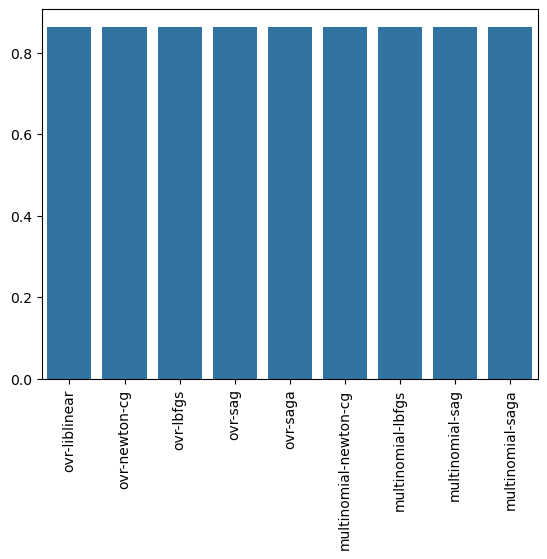

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = params, y = scores)
plt.xticks(rotation=90)
plt.show()

In [63]:
modelo_prueba = LogisticRegression(random_state=42,solver='saga',multi_class='multinomial',max_iter=20000)
modelo_prueba.fit(x_train.tolist(),y_train)
predi = modelo_prueba.predict(x_test.tolist())
accuracy_score(y_test,predi)

/home/ackerman/anaconda3/envs/chatbot_nltk/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.8625

In [68]:
while True:
    get_prediction(bow_model=bow_model,model_clasification=modelo_prueba)

saludo, presentacion, infomacion, recomendacion
[[0.03529664 0.87020814 0.06616443 0.02833079]]
target: presentacion


IndexError: index 0 is out of bounds for axis 0 with size 0